- 과적합 피하기 - 초음파 광물 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# 초기화
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from google.colab import files
up = files.upload()

Saving sonar.csv to sonar.csv


In [4]:
df = pd.read_csv("sonar.csv", header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R


In [5]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [6]:
# X data: scaling
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df.iloc[:, :-1].values)

In [7]:
# Y dat: label encoding
from sklearn.preprocessing import LabelEncoder
y_labeled = LabelEncoder().fit_transform(df[60].values)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_labeled, stratify = y_labeled,
    test_size =  0.2, random_state=seed
)

- 모델 정의/설정/학습/평가

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- Case 1) 은닉층 2개

In [10]:
model1 = Sequential([
    Dense(80, input_dim=60, activation = 'relu'),
    Dense(12, activation='relu'),
    Dense(1, activation = 'sigmoid')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                4880      
                                                                 
 dense_1 (Dense)             (None, 12)                972       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [25]:
model1.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist1 = model1.fit(X_train, y_train, validation_split=0.2,
                   epochs=200, batch_size=100, verbose=0)

In [26]:
model1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.4500 - accuracy: 0.9048


[0.4499545395374298, 0.9047619104385376]

In [14]:
params1, acc1 = 5865, 0.9047

- Case2) 은닉층 4개

In [16]:
model2 = Sequential([
    Dense(80, input_dim=60, activation = 'relu'),
    Dense(48, activation='relu'),
    Dense(20, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation = 'sigmoid')
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 80)                4880      
                                                                 
 dense_9 (Dense)             (None, 48)                3888      
                                                                 
 dense_10 (Dense)            (None, 20)                980       
                                                                 
 dense_11 (Dense)            (None, 8)                 168       
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [22]:
model2.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
                   epochs=200, batch_size=100, verbose=0)
model2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 1.1201 - accuracy: 0.8333


[1.1201035976409912, 0.8333333134651184]

In [23]:
params2, acc2 = 9925, 0.8333

- Case 3) 은닉층 6개

In [19]:
model3 = Sequential([
    Dense(80, input_dim=60, activation = 'relu'),
    Dense(64, activation='relu'),
    Dense(40, activation='relu'),
    Dense(24, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation = 'sigmoid')
])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 80)                4880      
                                                                 
 dense_14 (Dense)            (None, 64)                5184      
                                                                 
 dense_15 (Dense)            (None, 40)                2600      
                                                                 
 dense_16 (Dense)            (None, 24)                984       
                                                                 
 dense_17 (Dense)            (None, 10)                250       
                                                                 
 dense_18 (Dense)            (None, 4)                 44        
                                                                 
 dense_19 (Dense)            (None, 1)                

In [21]:
model3.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist3 = model3.fit(X_train, y_train, validation_split=0.2,
                   epochs=200, batch_size=100, verbose=0)
model3.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 1.1411 - accuracy: 0.8333


[1.14113450050354, 0.8333333134651184]

In [31]:
params3, acc3 = 13947,  0.8333

- Case 4) 은닉층 8개

In [27]:
model4 = Sequential([
    Dense(80, input_dim=60, activation = 'relu'),
    Dense(64, activation='relu'),
    Dense(48, activation='relu'),
    Dense(36, activation='relu'),
    Dense(28, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation = 'sigmoid')
])
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 80)                4880      
                                                                 
 dense_21 (Dense)            (None, 64)                5184      
                                                                 
 dense_22 (Dense)            (None, 48)                3120      
                                                                 
 dense_23 (Dense)            (None, 36)                1764      
                                                                 
 dense_24 (Dense)            (None, 28)                1036      
                                                                 
 dense_25 (Dense)            (None, 16)                464       
                                                                 
 dense_26 (Dense)            (None, 10)               

In [28]:
model4.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, validation_split=0.2,
                   epochs=200, batch_size=100, verbose=0)
model4.evaluate(X_test, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 1.4516 - accuracy: 0.7143


[1.4515798091888428, 0.7142857313156128]

In [30]:
params4, acc4 = 16667, 0.7142

- 학습과정 시각화

In [32]:
y_acc1 = hist1.history['accuracy']
y_acc2 = hist2.history['accuracy']
y_acc3 = hist3.history['accuracy']
y_acc4 = hist4.history['accuracy']
y_vloss1 = hist1.history['val_loss']
y_vloss2 = hist2.history['val_loss']
y_vloss3 = hist3.history['val_loss']
y_vloss4 = hist4.history['val_loss']
xs = np.arange(1, len(y_acc1) + 1)

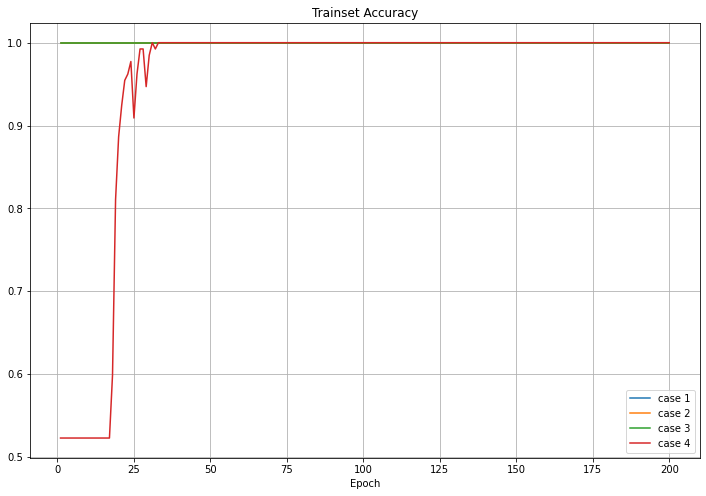

In [33]:
plt.figure(figsize = (12, 8))
plt.plot(xs, y_acc1, label = 'case 1')
plt.plot(xs, y_acc2, label = 'case 2')
plt.plot(xs, y_acc3, label = 'case 3')
plt.plot(xs, y_acc4, label = 'case 4')
plt.legend(), plt.grid()
plt.xlabel('Epoch'), plt.title('Trainset Accuracy')
plt.show()

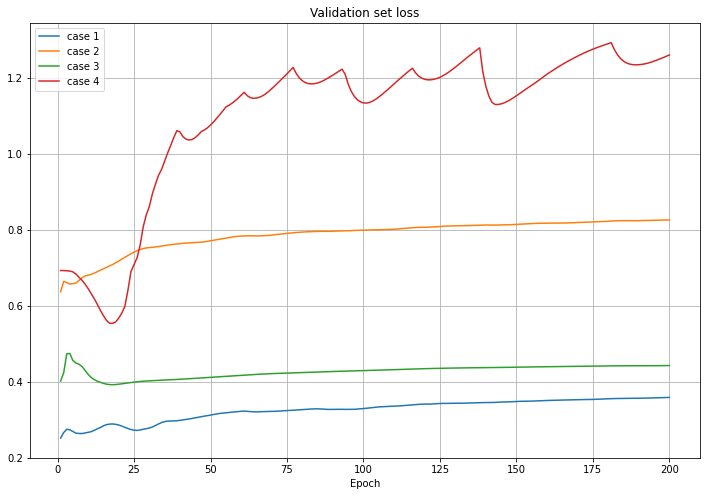

In [34]:
plt.figure(figsize = (12, 8))
plt.plot(xs, y_vloss1, label = 'case 1')
plt.plot(xs, y_vloss2, label = 'case 2')
plt.plot(xs, y_vloss3, label = 'case 3')
plt.plot(xs, y_vloss4, label = 'case 4')
plt.legend(), plt.grid()
plt.xlabel('Epoch'), plt.title('Validation set loss')
plt.show()

### Case 2에 대해서 베스트 모델

In [40]:
model = Sequential([
    Dense(80, input_dim=60, activation = 'relu'),
    Dense(48, activation='relu'),
    Dense(20, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation = 'sigmoid')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 80)                4880      
                                                                 
 dense_35 (Dense)            (None, 48)                3888      
                                                                 
 dense_36 (Dense)            (None, 20)                980       
                                                                 
 dense_37 (Dense)            (None, 8)                 168       
                                                                 
 dense_38 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

- 베스트 모델만 저장하는 콜백 함수

In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('sonar_best.h5', monitor = 'val_loss', 
                     verbose=1, save_best_only=True)

In [43]:
# epoch가 종료될 때마다 callback 함수를 실행하도록 설정
hist = model.fit(X_train, y_train, validation_split=0.2,
                epochs=200, batch_size=100, verbose=0, 
                callbacks=[mc])


Epoch 1: val_loss improved from inf to 0.60430, saving model to sonar_best.h5

Epoch 2: val_loss improved from 0.60430 to 0.57559, saving model to sonar_best.h5

Epoch 3: val_loss improved from 0.57559 to 0.55072, saving model to sonar_best.h5

Epoch 4: val_loss improved from 0.55072 to 0.52669, saving model to sonar_best.h5

Epoch 5: val_loss improved from 0.52669 to 0.50632, saving model to sonar_best.h5

Epoch 6: val_loss improved from 0.50632 to 0.48817, saving model to sonar_best.h5

Epoch 7: val_loss improved from 0.48817 to 0.46769, saving model to sonar_best.h5

Epoch 8: val_loss improved from 0.46769 to 0.44963, saving model to sonar_best.h5

Epoch 9: val_loss improved from 0.44963 to 0.43403, saving model to sonar_best.h5

Epoch 10: val_loss improved from 0.43403 to 0.42365, saving model to sonar_best.h5

Epoch 11: val_loss improved from 0.42365 to 0.41435, saving model to sonar_best.h5

Epoch 12: val_loss improved from 0.41435 to 0.40748, saving model to sonar_best.h5

Epoc

In [44]:
from tensorflow.keras.models import load_model

best_model = load_model('sonar_best.h5')
best_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.5825 - accuracy: 0.7143


[0.5824726819992065, 0.7142857313156128]

In [45]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

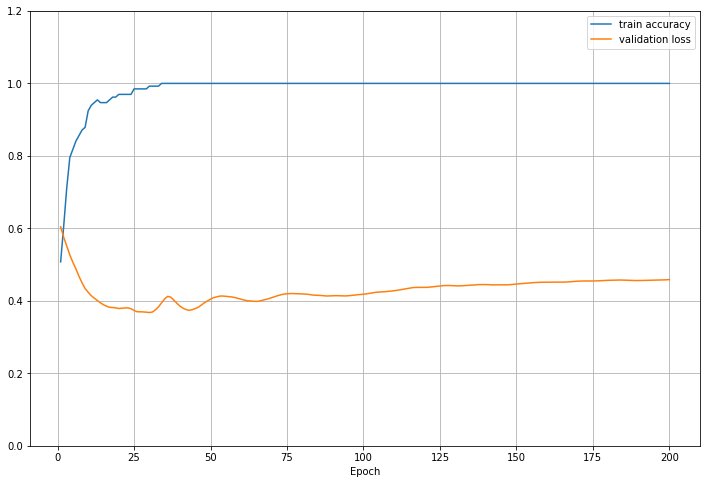

In [47]:
plt.figure(figsize = (12, 8))
plt.plot(xs, y_acc, label = 'train accuracy')
plt.plot(xs, y_vloss, label = 'validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.show()

- 조기 종료 콜백 함수

In [48]:
del model

In [49]:
model = Sequential([
    Dense(80, input_dim=60, activation = 'relu'),
    Dense(48, activation='relu'),
    Dense(20, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation = 'sigmoid')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 80)                4880      
                                                                 
 dense_40 (Dense)            (None, 48)                3888      
                                                                 
 dense_41 (Dense)            (None, 20)                980       
                                                                 
 dense_42 (Dense)            (None, 8)                 168       
                                                                 
 dense_43 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [51]:
from tensorflow.keras.callbacks import EarlyStopping
mc = ModelCheckpoint('sonar_best.h5', monitor = 'val_loss', 
                     verbose=1, save_best_only=True)
es = EarlyStopping(patience=20)

In [52]:
# epoch가 종료될 때마다 callback 함수를 실행하도록 설정
hist = model.fit(X_train, y_train, validation_split=0.2,
                epochs=200, batch_size=100, verbose=1, 
                callbacks=[mc, es])

Epoch 1/200
1/2 [==============>...............] - ETA: 1s - loss: 0.7058 - accuracy: 0.5100
Epoch 1: val_loss improved from inf to 0.67180, saving model to sonar_best.h5
2/2 [==============================] - 1s 334ms/step - loss: 0.7048 - accuracy: 0.4924 - val_loss: 0.6718 - val_accuracy: 0.6471
Epoch 2/200
1/2 [==============>...............] - ETA: 0s - loss: 0.6767 - accuracy: 0.5400
Epoch 2: val_loss improved from 0.67180 to 0.65699, saving model to sonar_best.h5
2/2 [==============================] - 0s 85ms/step - loss: 0.6698 - accuracy: 0.5606 - val_loss: 0.6570 - val_accuracy: 0.7059
Epoch 3/200
1/2 [==============>...............] - ETA: 0s - loss: 0.6551 - accuracy: 0.6600
Epoch 3: val_loss improved from 0.65699 to 0.64114, saving model to sonar_best.h5
2/2 [==============================] - 0s 106ms/step - loss: 0.6433 - accuracy: 0.6894 - val_loss: 0.6411 - val_accuracy: 0.7059
Epoch 4/200
1/2 [==============>...............] - ETA: 0s - loss: 0.6288 - accuracy: 0.7600


In [53]:
best_model = load_model('sonar_best.h5')
best_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.4832 - accuracy: 0.6905


[0.48319780826568604, 0.6904761791229248]